<a href="https://colab.research.google.com/github/SurabhiInamdar/DS_Projects/blob/main/Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group - 188**




**Problem Statement:**
An organization wanted to mine association rules of frequently bought items from its stores and suggest some recommendations to its customers. 
To recognize patterns from the available data and evaluate efficacy of methods to obtain patterns. Your activities should include - performing various activities pertaining to the data such as, preparing the dataset for analysis; investigating the relationships in the data set with visualization; identify frequent patterns; formulate association rules and evaluate quality of rules.

In [ ]:
# Installing libraries

# If mlxtend or matplotlib is not installed please uncomment the below lines and run this
!pip install mlxtend
!pip install matplotlib

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as mlapriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
%matplotlib inline

In [ ]:
# Import dataset
df = pd.read_excel("Dataset.xlsx", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning
As not all transactions have same number of items, so replace NaN values with empty literal - ''

In [ ]:
df.fillna('', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


Performing EDA (Exploratory Data Analysis) to see what data can reveal beyond the formal modeling or hypothesis testing task and provide a better understanding of data set variables and the relationships between them

### No. of data points 
Total number of transactions are : 7501

In [ ]:
df.shape

(7501, 20)

In [ ]:
pd.options.display.max_rows = 200

### Item wise count
Get number of times an item was purchased in all transactions

In [ ]:
item_sum = df.apply(pd.value_counts).sum(axis=1)
item_sum = item_sum.iloc[1:]
item_sum

almonds                  153.0
antioxydant juice         67.0
asparagus                 36.0
avocado                  250.0
babies food               34.0
bacon                     65.0
barbecue sauce            81.0
black tea                107.0
blueberries               69.0
body spray                86.0
bramble                   14.0
brownies                 253.0
bug spray                 65.0
burger sauce              44.0
burgers                  654.0
butter                   226.0
cake                     608.0
candy bars                73.0
carrots                  115.0
cauliflower               36.0
cereals                  193.0
champagne                351.0
chicken                  450.0
chili                     46.0
chocolate               1230.0
chocolate bread           32.0
chutney                   31.0
cider                     79.0
clothes accessories       63.0
cookies                  603.0
cooking oil              383.0
corn                      36.0
cottage 

### Most frequently bought item
A plot to show top 25 items that are bought most frequently

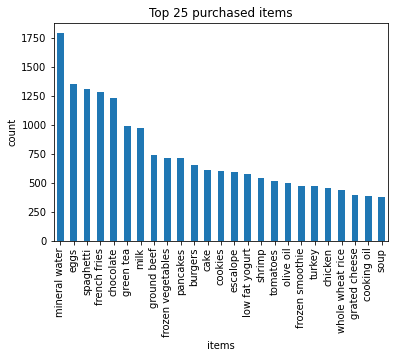

In [ ]:
item_sum.sort_values(inplace=True, ascending=False)
item_sum.head(25).plot(kind='bar', title='Top 25 purchased items')
plt.xlabel('items')
plt.ylabel('count')
plt.show()

Since all columns in the dataset contribute to the association rule, there is no need for variable/attribute selection process

### Preprocess data
For using apriori, we need data in list of list format, i.e., 
transaction_list = [[item1, item2, .., itemn], [item1, item2, .. itemk],...., ]

In [ ]:
transaction_list = []
for i in range(0,len(df)):
    transaction_list.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!=''])
transaction_list[6:10]

[['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

**Support:** This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

**Confidence:** This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

**Lift:** This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

## Association analysis using mlxtend

### Preprocess

Transform data into one hot encoded numpy boolean array

In [ ]:
transaction_encoder = TransactionEncoder()
transformed_data = transaction_encoder.fit_transform(transaction_list)
transformed_data

array([[ True,  True, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [ ]:
# Convert into pandas dataframe for analysis
mldf = pd.DataFrame(transformed_data, columns= transaction_encoder.columns_)
mldf.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


## 1. Minimum support = 0.003

In [ ]:
# Apply apriori algorithm
freq_itemsets = mlapriori(mldf, min_support=0.003, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004799,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)
...,...,...
1438,0.003066,"(pancakes, ground beef, spaghetti, mineral water)"
1439,0.003066,"(ground beef, spaghetti, tomatoes, mineral water)"
1440,0.003333,"(milk, spaghetti, olive oil, mineral water)"
1441,0.003066,"(shrimp, spaghetti, mineral water, milk)"


### Frequent itemsets

In [ ]:
# Add len column generated from number of items
freq_itemsets['len'] = freq_itemsets['itemsets'].apply(lambda x : len(x))
freq_itemsets

,support,itemsets,len
0,0.020397,(almonds),1
1,0.008932,(antioxydant juice),1
2,0.004799,(asparagus),1
3,0.033329,(avocado),1
4,0.004533,(babies food),1
...,...,...,...
1438,0.003066,"(pancakes, ground beef, spaghetti, mineral water)",4
1439,0.003066,"(ground beef, spaghetti, tomatoes, mineral water)",4
1440,0.003333,"(milk, spaghetti, olive oil, mineral water)",4
1441,0.003066,"(shrimp, spaghetti, mineral water, milk)",4


Creating Association Rules with minimum threshold of lift = 1

In [ ]:
# Generate association rules
ml_rules = association_rules(freq_itemsets, metric='lift', min_threshold=3)

In [ ]:
# Sort rules by confidence
ml_rules.sort_values('confidence', ascending=False).head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
338,"(soup, frozen vegetables, milk)",(mineral water),0.003999,0.238368,0.003066,0.766667,3.216312,0.002113,3.264136
36,"(cereals, ground beef)",(spaghetti),0.004533,0.174110,0.003066,0.676471,3.885303,0.002277,2.552751
183,"(olive oil, tomatoes)",(spaghetti),0.007199,0.174110,0.004399,0.611111,3.509912,0.003146,2.123717
336,"(soup, frozen vegetables, mineral water)",(milk),0.005066,0.129583,0.003066,0.605263,4.670863,0.002410,2.205057
143,"(ground beef, tomato sauce)",(spaghetti),0.005333,0.174110,0.003066,0.575000,3.302508,0.002138,1.943270
64,"(ground beef, cooking oil)",(spaghetti),0.008399,0.174110,0.004799,0.571429,3.281995,0.003337,1.927076
392,"(ground beef, tomatoes, mineral water)",(spaghetti),0.005466,0.174110,0.003066,0.560976,3.221959,0.002115,1.881194
305,"(ground beef, frozen vegetables, milk)",(spaghetti),0.005733,0.174110,0.003066,0.534884,3.072100,0.002068,1.775663
209,"(chocolate, ground beef, frozen vegetables)",(spaghetti),0.005733,0.174110,0.003066,0.534884,3.072100,0.002068,1.775663
73,"(eggs, red wine)",(spaghetti),0.007066,0.174110,0.003733,0.528302,3.034297,0.002503,1.750887


In [ ]:
print(len(ml_rules))
print((ml_rules))

422
                    antecedents  ... conviction
0              (cottage cheese)  ...   1.084220
1                    (brownies)  ...   1.079026
2                     (chicken)  ...   1.064858
3                 (light cream)  ...   1.325072
4                    (escalope)  ...   1.057349
..                          ...  ...        ...
417       (milk, mineral water)  ...   1.052134
418       (spaghetti, tomatoes)  ...   1.132311
419  (spaghetti, mineral water)  ...   1.044276
420   (tomatoes, mineral water)  ...   1.117155
421                  (tomatoes)  ...   1.034692

[422 rows x 9 columns]


### Conclusion for 1st rule in the case where minimum support is 0.003

The output for first rule is as above. 

For example:
The rule states that (milk, frozen vegetables, soup) & (mineral water)	 are bought frequently. The confidence for this rule is 0.76 which means that out of all the transactions containing milk, frozen vegetables, soup ~76% of the transactions are likely to contain mineral water as well. Finally, lift of 3.21 shows that the mineral water is 3.21 more likely to be bought by such customers, compared to its default sale.

## 2. Minimum Support = 0.006

In [ ]:
# Apply apriori algorithm
freq_itemsets1 = mlapriori(mldf, min_support=0.006, use_colnames=True)
freq_itemsets1['len'] = freq_itemsets1['itemsets'].apply(lambda x : len(x))
freq_itemsets1

,support,itemsets,len
0,0.020397,(almonds),1
1,0.008932,(antioxydant juice),1
2,0.033329,(avocado),1
3,0.008666,(bacon),1
4,0.010799,(barbecue sauce),1
...,...,...,...
537,0.008532,"(shrimp, spaghetti, mineral water)",3
538,0.007466,"(soup, spaghetti, mineral water)",3
539,0.009332,"(spaghetti, tomatoes, mineral water)",3
540,0.006399,"(turkey, spaghetti, mineral water)",3


In [ ]:
# Generate association rules
ml_rules1 = association_rules(freq_itemsets1, metric='lift', min_threshold=3)

In [ ]:
# Sort rules by confidence
ml_rules1.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(herb & pepper, spaghetti)",(ground beef),0.016264,0.098254,0.006399,0.393443,4.004360,0.004801,1.486663
12,"(herb & pepper, mineral water)",(ground beef),0.017064,0.098254,0.006666,0.390625,3.975683,0.004989,1.479789
0,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
8,"(spaghetti, tomatoes)",(frozen vegetables),0.020931,0.095321,0.006666,0.318471,3.341054,0.004671,1.327427
4,"(spaghetti, frozen vegetables)",(ground beef),0.027863,0.098254,0.008666,0.311005,3.165328,0.005928,1.308785
6,"(shrimp, mineral water)",(frozen vegetables),0.023597,0.095321,0.007199,0.305085,3.200616,0.004950,1.301856
2,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,0.006059,1.282270
9,"(spaghetti, frozen vegetables)",(tomatoes),0.027863,0.068391,0.006666,0.239234,3.498046,0.004760,1.224568
22,"(milk, spaghetti)",(olive oil),0.035462,0.065858,0.007199,0.203008,3.082509,0.004864,1.172084
20,"(milk, mineral water)",(soup),0.047994,0.050527,0.008532,0.177778,3.518499,0.006107,1.154765


In [ ]:
print(len(ml_rules1))
print((ml_rules1))

24
                       antecedents  ... conviction
0                  (herb & pepper)  ...   1.332860
1                    (ground beef)  ...   1.135410
2              (whole wheat pasta)  ...   1.282270
3                      (olive oil)  ...   1.104713
4   (spaghetti, frozen vegetables)  ...   1.308785
5                    (ground beef)  ...   1.066168
6          (shrimp, mineral water)  ...   1.301856
7              (frozen vegetables)  ...   1.056170
8            (spaghetti, tomatoes)  ...   1.327427
9   (spaghetti, frozen vegetables)  ...   1.224568
10                      (tomatoes)  ...   1.077119
11             (frozen vegetables)  ...   1.052684
12  (herb & pepper, mineral water)  ...   1.479789
13    (ground beef, mineral water)  ...   1.135470
14                 (herb & pepper)  ...   1.108460
15                   (ground beef)  ...   1.054474
16      (herb & pepper, spaghetti)  ...   1.486663
17        (ground beef, spaghetti)  ...   1.136011
18                 (herb & p

### Conclusion for 2nd rule in the case where minimum support is 0.006

The output for second rule is as above.  

Foe example: The rule states that (herb & pepper, spaghetti)	 & (ground beef) are bought frequently. The confidence for this rule is 0.39 which means that out of all the transactions containing herb & pepper & spaghetti ~39% of the transactions are likely to contain ground beef as well. Finally, lift of 4 shows that the ground beef is 4 more likely to be bought by such customers, compared to its default sale.

## 3. Minimum Support = 0.1

In [ ]:
# Apply apriori algorithm
freq_itemsets2 = mlapriori(mldf, min_support=0.01, use_colnames=True)
freq_itemsets2['len'] = freq_itemsets2['itemsets'].apply(lambda x : len(x))
freq_itemsets2

,support,itemsets,len
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(ground beef, milk, mineral water)",3
253,0.017064,"(ground beef, spaghetti, mineral water)",3
254,0.015731,"(milk, spaghetti, mineral water)",3
255,0.010265,"(spaghetti, olive oil, mineral water)",3


In [ ]:
# Generate association rules
ml_rules2 = association_rules(freq_itemsets2, metric='lift', min_threshold=3)

In [ ]:
# Sort rules by confidence
ml_rules2.sort_values('confidence', ascending=False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.33286
1,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.13541


In [ ]:
print(len(ml_rules2))
print((ml_rules2))

2
       antecedents      consequents  ...  leverage  conviction
0  (herb & pepper)    (ground beef)  ...  0.011138     1.33286
1    (ground beef)  (herb & pepper)  ...  0.011138     1.13541

[2 rows x 9 columns]


## Conclusion for 3rd rule in the case where minimum support is 0.01

The output for second rule is as above.  

For example: The rule states that (herb & pepper) & (ground beef) are bought frequently. The confidence for this rule is 0.32 which means that out of all the transactions containing herb & pepper ~32% of the transactions are likely to contain ground beef as well. Finally, lift of 3.29 shows that the ground beef is 3.29 more likely to be bought by such customers, compared to its default sale.

## Conclusion

* As we increase the minimum support value 
 * we get lesser number of frequent item sets 
 * The confidence among association rule decreases